### **Phase 3: Two Approaches for Team Differentiation** 📊

#### **K-Means Clustering**

In [3]:
from kmeansclassifier import kmeansclassifier

In [4]:
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"
classifier = kmeansclassifier(video_path, model_path="/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt") 

Extracting player crops: 0it [00:00, ?it/s]


0: 384x640 3 players, 76.3ms
Speed: 4.6ms preprocess, 76.3ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 57.5ms
Speed: 1.2ms preprocess, 57.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 54.7ms
Speed: 1.2ms preprocess, 54.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 54.1ms
Speed: 1.6ms preprocess, 54.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 53.9ms
Speed: 1.2ms preprocess, 53.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 59.2ms
Speed: 1.3ms preprocess, 59.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 54.0ms
Speed: 1.2ms preprocess, 54.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 50.2ms
Speed: 1.2ms preprocess, 50.2ms inference, 0.3ms postprocess per image at shape (1

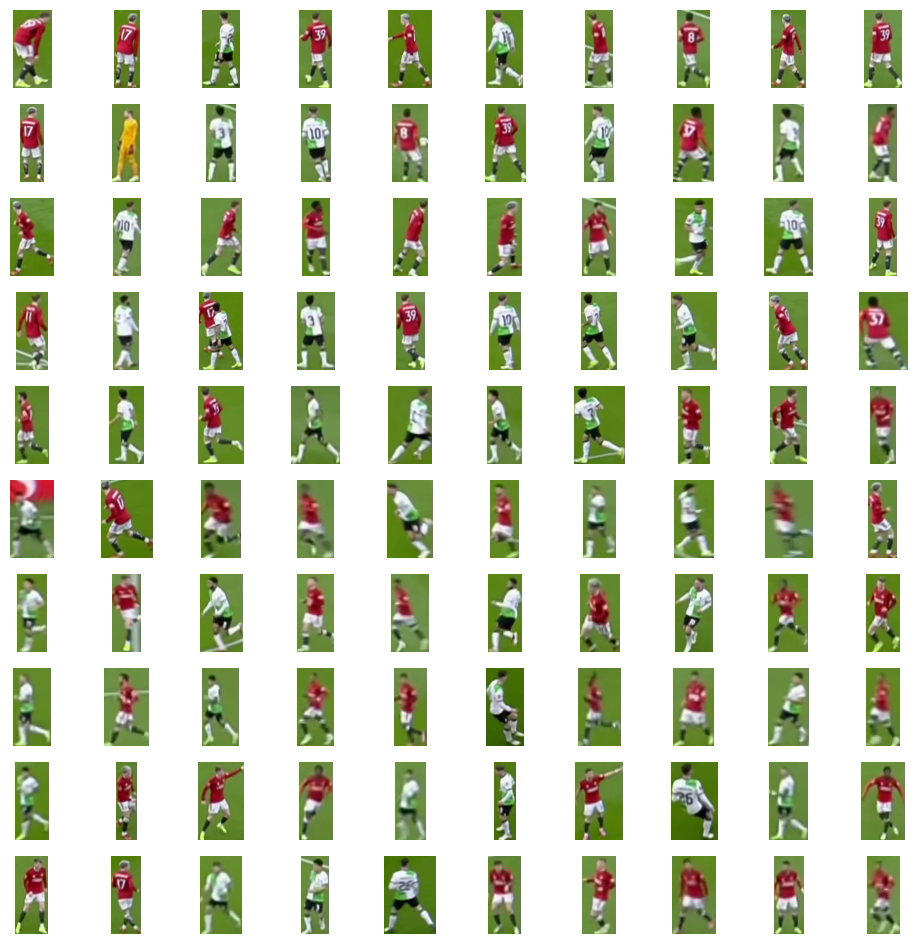

In [5]:
crops = classifier.get_crops_from_frames(stride=150, player_id=2)
classifier.plot_crops(crops)

In [6]:
# Extract CLIP features
features = classifier.get_features(crops)

Extracting embeddings: 0it [00:00, ?it/s]

In [7]:
# Train KMeans on features
classifier.train_kmeans(features)
# Then use predicted clusters separately
clusters = classifier.predict_clusters(features)

🔄 Entraînement de KMeans...
✅ KMeans entraîné avec succès !


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


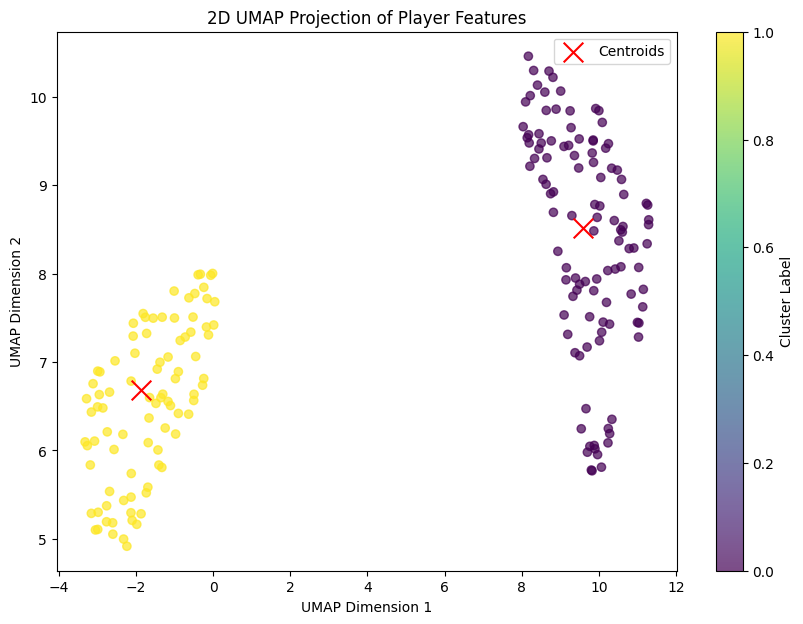

In [8]:
projection_2d = classifier.projection_umap(features, n_components=2)
classifier.plot_projection(projection_2d, clusters)

Variance intra-cluster: 493.43195
Variance inter-cluster: 6579.466201782227


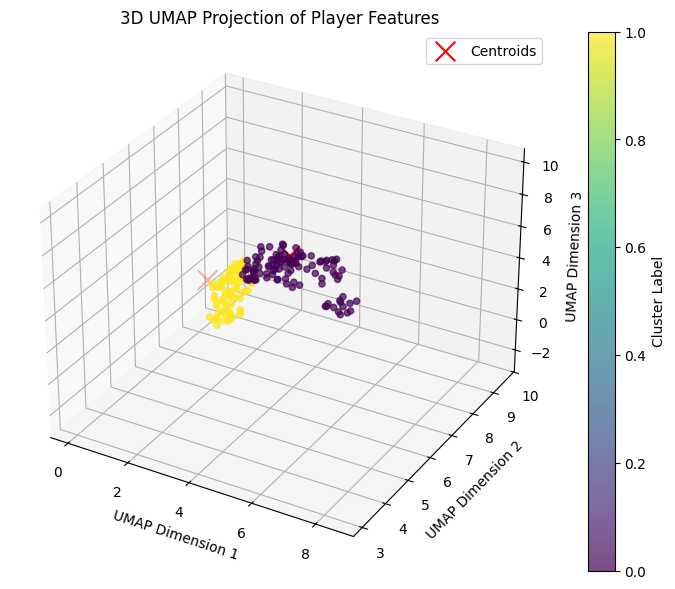

In [9]:
projection_3d = classifier.projection_umap(features, n_components=3)
classifier.plot_projection_3d(projection_3d, clusters)

📊 Evaluating KMeans with 2 clusters
Variance intra-cluster: 527.96594
Variance inter-cluster: 6768.742893218994
🔹 Silhouette Score: 0.1815 (Higher is better)
📊 Ratio de Séparation: 12.82


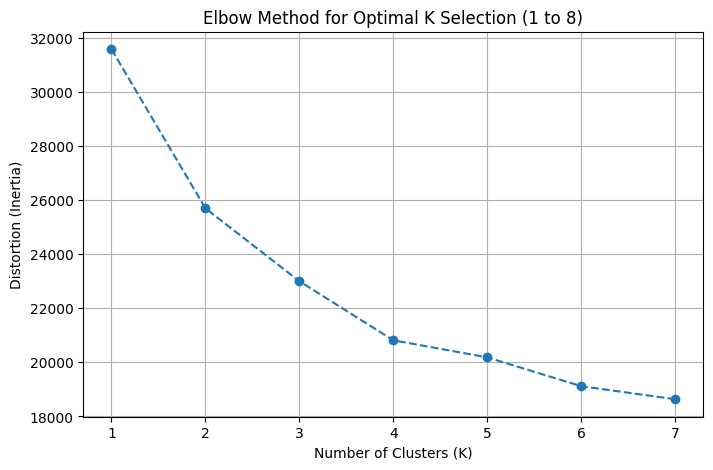

✅ Evaluation completed.


In [10]:
classifier.evaluate()

#### **HSV Classifier**

In [1]:
from hsvclassifier import HSVClassifier

Extracting player crops: 0it [00:00, ?it/s]


0: 384x640 3 players, 59.0ms
Speed: 1.6ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 81.4ms
Speed: 1.6ms preprocess, 81.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 57.0ms
Speed: 2.4ms preprocess, 57.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 60.0ms
Speed: 1.9ms preprocess, 60.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 61.5ms
Speed: 1.3ms preprocess, 61.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 59.2ms
Speed: 1.5ms preprocess, 59.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 68.2ms
Speed: 1.3ms preprocess, 68.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 61.6ms
Speed: 1.3ms preprocess, 61.6ms inference, 0.5ms postprocess per image at shape (

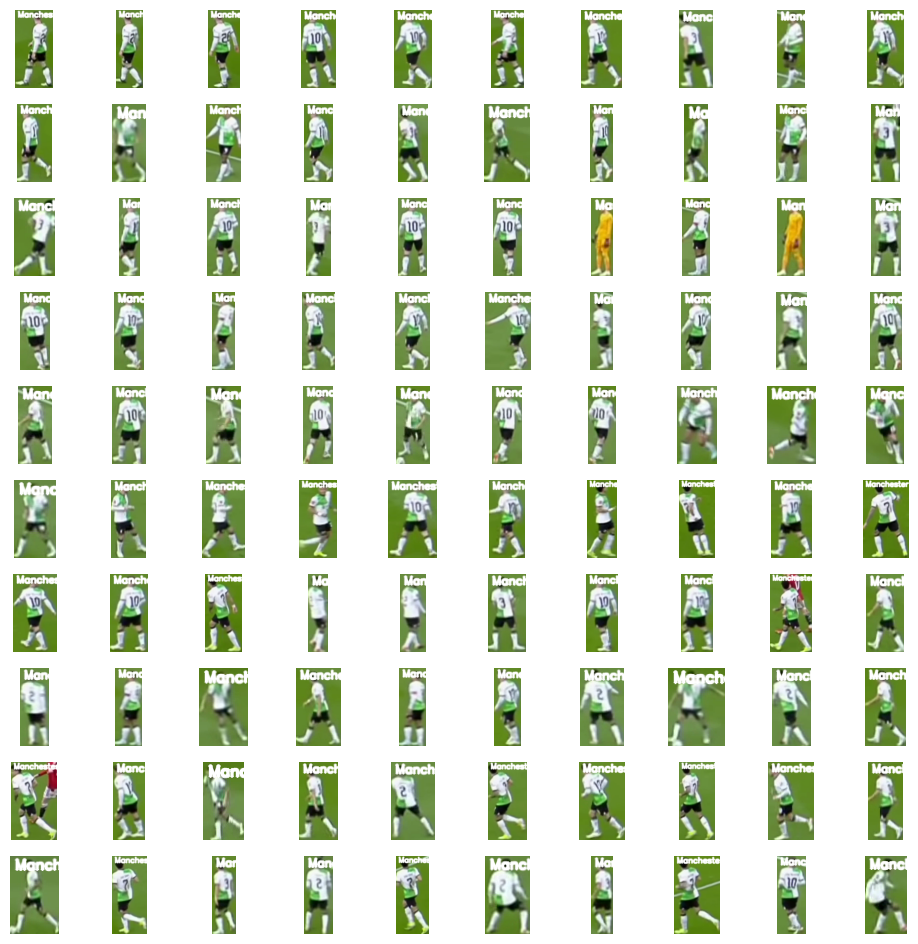

📌 Liverpool


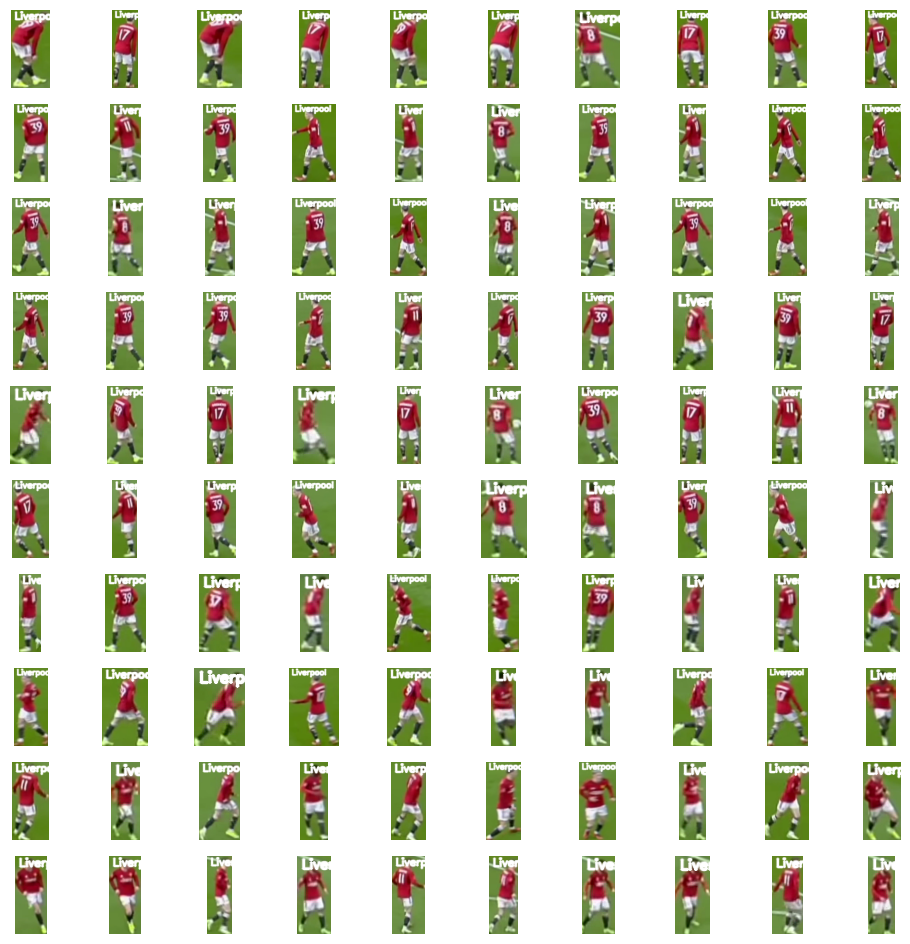

In [2]:
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"
classifier = HSVClassifier(video_path, model_path="/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt")

results = classifier.predict(stride=30) 
classifier.plot_classified_crops(results)

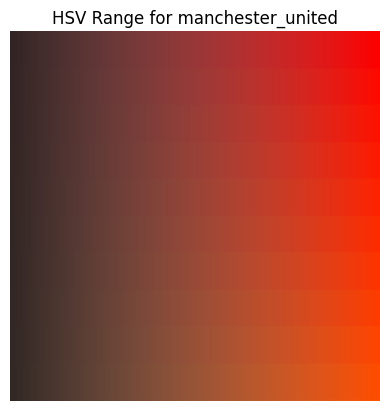

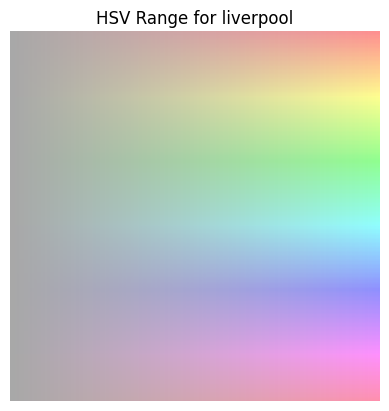

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cv2

# HSV range dictionary
color_ranges = {
    "manchester_united": [(0, 70, 50), (10, 255, 255)],  # red
    "liverpool": [(0, 0, 168), (172, 111, 255)]   # white
}

# Function to create a gradient image for an HSV range
def plot_hsv_range(hsv_range, label):
    # Generate a gradient of HSV values within the range
    h_range = np.linspace(hsv_range[0][0], hsv_range[1][0], 256)
    s_range = np.linspace(hsv_range[0][1], hsv_range[1][1], 256)
    v_range = np.linspace(hsv_range[0][2], hsv_range[1][2], 256)
    
    # Create a meshgrid of HSV values
    hsv_image = np.zeros((256, 256, 3), dtype=np.uint8)
    for i in range(256):
        hsv_image[i, :, 0] = h_range[i]  # Hue
        hsv_image[:, i, 1] = s_range[i]  # Saturation
        hsv_image[:, i, 2] = v_range[i]  # Value

    # Convert the HSV image to RGB using OpenCV
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

    # Plotting
    plt.imshow(rgb_image)
    plt.title(f"HSV Range for {label}")
    plt.axis("off")
    plt.show()

# Plot the HSV ranges for Manchester United and Liverpool
for team, hsv_range in color_ranges.items():
    plot_hsv_range(hsv_range, team)


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

(74, 48, 3)
(3552, 3)
[[114 137  50]
 [114 137  50]
 [114 137  50]
 ...
 [113 134  49]
 [112 134  49]
 [112 134  47]]
[82 82 82 ... 83 82 82]


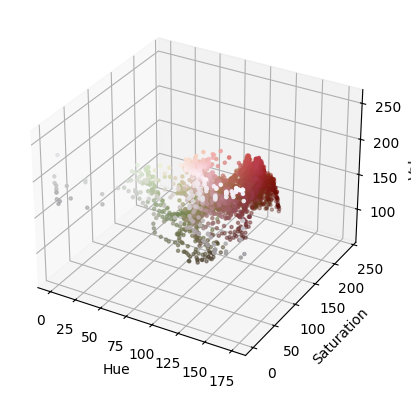

In [6]:
image = cv2.imread('united.png')
print(image.shape)

man = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
pixels = man.reshape((np.shape(man)[0]*np.shape(man)[1], 3))
print(pixels.shape)
print(pixels)

norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixels)
pixels = norm(pixels).tolist()

imagehsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(imagehsv)
hf, sf, vf = h.flatten(), s.flatten(), v.flatten()
print(hf)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.scatter(hf, sf, vf, facecolors=pixels, marker=".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

(58, 52, 3)
(3016, 3)
[[110 137  47]
 [110 137  47]
 [109 136  46]
 ...
 [112 137  52]
 [112 137  52]
 [112 137  52]]
[81 81 81 ... 81 81 81]


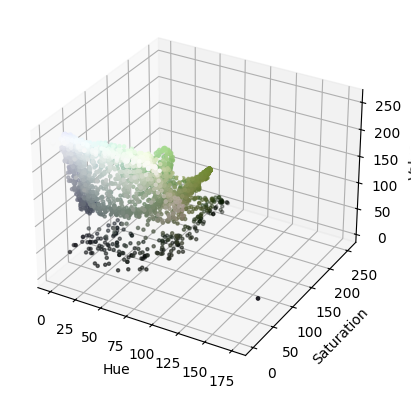

In [7]:
image_li = cv2.imread('liv.png')
print(image_li.shape)

li = cv2.cvtColor(image_li, cv2.COLOR_BGR2RGB)  
pixels = li.reshape((np.shape(li)[0]*np.shape(li)[1], 3))
print(pixels.shape)
print(pixels)

norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixels)
pixels = norm(pixels).tolist()

imagehsv_li = cv2.cvtColor(image_li, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(imagehsv_li)
hf, sf, vf = h.flatten(), s.flatten(), v.flatten()
print(hf)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.scatter(hf, sf, vf, facecolors=pixels, marker=".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [8]:
bounderies_liverpool = [[17, 0, 138], [122, 113, 255] ]
bounderies_united = [[0, 100, 0], [8, 255, 255] ]

lower_liverpool = np.array(bounderies_liverpool[0], dtype = "uint8")
upper_liverpool = np.array(bounderies_liverpool[1], dtype = "uint8")

lower_united = np.array(bounderies_united[0], dtype = "uint8")
upper_united = np.array(bounderies_united[1], dtype = "uint8")

mask_liverpool = cv2.inRange(imagehsv_li, lower_liverpool, upper_liverpool)
mask_united = cv2.inRange(imagehsv, lower_united, upper_united)

cv2.imshow("Mask Liverpool", mask_liverpool)
cv2.waitKey(0)

2025-02-06 12:11:33.641 python[10299:328580] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 12:11:33.641 python[10299:328580] +[IMKInputSession subclass]: chose IMKInputSession_Modern


13

In [11]:
mask_united = cv2.bitwise_and(image, imagehsv, mask = mask_united)
masked_bgr_united = cv2.cvtColor(mask_united, cv2.COLOR_HSV2BGR)
cv2.imshow("Masked Liverpool", masked_bgr_united)
cv2.waitKey(0)

13

In [9]:
mask_liverpool = cv2.bitwise_and(image_li, imagehsv_li, mask = mask_liverpool)
masked_bgr_liverpool = cv2.cvtColor(mask_liverpool, cv2.COLOR_HSV2BGR)
cv2.imshow("Masked Liverpool", masked_bgr_liverpool)
cv2.waitKey(0)

13